# Plot results

In this notebook I create plots from the data that comes from the simulations. The data of each individual simulation is saved in an .npy array and are parsed here to generate plots of multiple simulations using Seaborn 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from os import listdir
from os.path import isfile, join
from os import getcwd 
import scipy


In [24]:
SIMULATION = 19
FEW_GROUPS_SIMULATION = 25
# SIMULATION_SETTINGS = 'effectiveness-go-4-gr-5-social_agents-go-3-gr-1' #-- original
# SIMULATION_SETTINGS = 'effectiveness-go-4-gr-5-social_agents-go-2-gr-2'
# SIMULATION_SETTINGS = 'effectiveness-go-5-gr-5-social_agents-go-2-gr-2'
SIMULATION_SETTINGS = 'effectiveness-go-5-gr-5-social_agents-go-3-gr-1'
# SIMULATION_SETTINGS = 'effectiveness-go-1-gr-5-social_agents-go-2-gr-2'


In [25]:
path = getcwd()

new_plot_path = path + '/output/papersims/plots/' + SIMULATION_SETTINGS
if not os.path.exists(new_plot_path):
    os.makedirs(new_plot_path)

## Parsing

In [26]:
longpath = path + '/output/papersims/' +  SIMULATION_SETTINGS
print(f'Files from path: {longpath} \n')
file_names = [f for f in listdir(f'{longpath}') if isfile(join(f'{longpath}', f))]
# file_names.remove('.DS_Store') #-- stupid Mac file

# print(file_names)

Files from path: /Users/tom/Desktop/PhD/Master-Thesis/Sim_V2/output/papersims/effectiveness-go-5-gr-5-social_agents-go-3-gr-1 



In [27]:
''' File name coding: number_agents - number_groups - number_rounds - generations - tolerance - gossip probability - selection '''

avg_group_gen_file_names = [filename for filename in file_names if 'avg-groupsize-over-pop' in filename]
avg_phenotypes_file_names = [filename for filename in file_names if 'avg_phenotypes_over_pop' in filename]
avg_group_phenotypes_file_names = [filename for filename in file_names if 'avg_phenotypes_per_group' in filename]
last_gen_file_names = [filename for filename in file_names if 'last_generation_groups' in filename]

avg_group_gen_file_names.sort()
avg_phenotypes_file_names.sort()
avg_group_phenotypes_file_names.sort()
last_gen_file_names.sort()

loaded_avg_group_files = []
loaded_avg_phenotypes_files = []
loaded_avg_group_phenotypes_files = []
loaded_last_gen_files = []

for file in avg_group_gen_file_names:
    loaded_avg_group_files.append(np.load(f'{longpath}/{file}', allow_pickle=True))

for file in avg_phenotypes_file_names:
    loaded_avg_phenotypes_files.append(np.load(f'{longpath}/{file}', allow_pickle=True))

for file in last_gen_file_names:
    loaded_last_gen_files.append(np.load(f'{longpath}/{file}', allow_pickle=True))

for file in avg_group_phenotypes_file_names:
    loaded_avg_group_phenotypes_files.append(np.load(f'{longpath}/{file}', allow_pickle=True))

''' Display the first 3 files that are loaded '''
print('Average group size per generation files: ')
for i, file in enumerate(loaded_avg_group_files[:2]):
    print(f'File name: {avg_group_gen_file_names[i]}')
    print(loaded_avg_group_files[i][:2])
    print()

print("Average phenotypes per generation: ")
for i, file in enumerate(loaded_avg_phenotypes_files[:2]):
    print(f'File name: {avg_phenotypes_file_names[i]}')
    print(loaded_avg_phenotypes_files[i][:2])
    print()

print("Average group phenotypes per generation: ")
for i, file in enumerate(loaded_avg_group_phenotypes_files[:2]):
    print(f'File name: {avg_group_phenotypes_file_names[i]}')
    print(loaded_avg_group_phenotypes_files[i][:1])
    print()

Average group size per generation files: 
File name: 2022-01-03T12-18-44-avg-groupsize-over-pop.npy
[[0
  array([5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  ,
         5.  , 5.05, 5.05, 5.  , 5.  , 5.2 , 5.35, 5.6 , 5.55, 5.4 , 5.55,
         5.55, 5.85, 5.7 , 5.6 , 5.7 , 5.7 , 5.95, 6.1 , 6.  , 5.75, 5.4 ,
         5.75, 5.95, 6.05, 6.35, 6.05, 6.3 , 6.2 , 6.8 , 6.65, 6.7 , 6.6 ,
         6.4 , 6.25, 6.1 , 6.15, 6.5 , 6.8 , 6.8 , 7.  , 6.9 , 6.85, 7.1 ,
         6.9 , 7.35, 7.35, 7.15, 7.15, 7.45, 7.1 , 7.  , 7.25, 7.5 , 7.6 ,
         7.6 , 7.8 , 8.05, 8.25, 8.5 , 8.75, 9.1 , 9.  , 9.55])           ]
 [1 array([ 5.  ,  5.  ,  5.  ,  5.  ,  5.05,  5.1 ,  5.2 ,  5.35,  5.3 ,
            5.3 ,  5.5 ,  5.6 ,  5.5 ,  5.6 ,  5.7 ,  5.7 ,  5.85,  5.9 ,
            6.15,  6.2 ,  6.35,  6.1 ,  6.55,  6.95,  6.95,  6.75,  6.65,
            6.7 ,  6.65,  6.65,  6.8 ,  7.  ,  6.65,  6.85,  6.9 ,  7.35,
            7.1 ,  7.05,  7.05,  7.25,  7.7 ,  7.5 ,  7.6 ,  8.4 ,  8.4 ,


In [28]:
generation_dataframes = [] #-- a list that contains dataframes that hold the average group size in the LAST round of a generation
for i, sim in enumerate(loaded_avg_group_files):
    # avg_group_size_last_round = []
    # print(sim)
                        
    temp_df = pd.DataFrame(columns = ['Simulation', 'Generation', 'Group size', 'Gossip probability', 'Tolerance'])

    for j, gen in enumerate(sim):

        avg_gossip_prob, avg_tolerance = loaded_avg_phenotypes_files[i][j]
        
        temp_df.loc[j] = [i, gen[0], gen[1][-1], avg_gossip_prob, avg_tolerance]

    generation_dataframes.append(temp_df)

all_sims_generations_dfs = pd.concat(generation_dataframes)
print(all_sims_generations_dfs.head())


   Simulation  Generation  Group size  Gossip probability  Tolerance
0         0.0         0.0        9.55              0.4990     0.5030
1         0.0         1.0       12.85              0.5010     0.5020
2         0.0         2.0       17.75              0.5015     0.5015
3         0.0         3.0       15.95              0.5025     0.5025
4         0.0         4.0       14.20              0.5015     0.5015


In [29]:
index = 0

dfs = []
for i, sim in enumerate(loaded_avg_group_phenotypes_files):
    group_phenotype_df = pd.DataFrame(columns = ['Simulation', 'Generation', 'Group label', 'Gossip probability', 'Tolerance'])
    
    for group in enumerate(sim):
        
        group_num, phenotypes = group

        group_gossip_prob, group_tolerance = phenotypes
        

        for j, prob in enumerate(group_gossip_prob):
        
            group_phenotype_df.loc[index] = [i, j, "{:.0f}".format(group_num), prob, group_tolerance[j]]
            index += 1
    dfs.append(group_phenotype_df)
all_sims_groups_dfs = pd.concat(dfs)
print(all_sims_groups_dfs.head())

    

  Simulation Generation Group label  Gossip probability  Tolerance
0          0          0           0                 0.5        0.5
1          0          1           0                 0.5        0.5
2          0          2           0                 0.5        0.5
3          0          3           0                 0.5        0.5
4          0          4           0                 0.5        0.5


In [30]:
index = 0

last_gen_df = pd.DataFrame(columns = ['Simulation', 'Round', 'Group label', 'Group size'])
# print(loaded_last_gen_files[0])
for sim_num, sim in enumerate(loaded_last_gen_files):

    for i, group in enumerate(sim):
        # print(i, group)
        for j, size in enumerate(group):

    #     print()
            last_gen_df.loc[index] = [sim_num, j, "{:.0f}".format(i), size]
            index += 1
print(last_gen_df.head())

  Simulation Round Group label  Group size
0          0     0           0         0.0
1          0     1           0         0.0
2          0     2           0         0.0
3          0     3           0         0.0
4          0     4           0         0.0


In [31]:
# phenotype_df = pd.melt(all_sims_generations_dfs[['Generation', 'Gossip probability', 'Tolerance']], 'Generation', var_name='Measures', value_name='Probability')

phenotype_df = pd.melt(all_sims_generations_dfs, id_vars=['Simulation', 'Generation', 'Group size'], value_vars=['Gossip probability', 'Tolerance'], var_name='Measures', value_name='Probability')

phenotype_df

,Simulation,Generation,Group size,Measures,Probability
0,0.0,0.0,9.55,Gossip probability,0.4990
1,0.0,1.0,12.85,Gossip probability,0.5010
2,0.0,2.0,17.75,Gossip probability,0.5015
3,0.0,3.0,15.95,Gossip probability,0.5025
4,0.0,4.0,14.20,Gossip probability,0.5015
...,...,...,...,...,...
9995,39.0,120.0,100.00,Tolerance,0.0298
9996,39.0,121.0,100.00,Tolerance,0.0259
9997,39.0,122.0,100.00,Tolerance,0.0263
9998,39.0,123.0,100.00,Tolerance,0.0265


## Plotting

In [32]:
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
sns.color_palette("tab20")
# sns.set_context("paper")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

In [33]:
all_sims_generations_dfs.head()

,Simulation,Generation,Group size,Gossip probability,Tolerance
0,0.0,0.0,9.55,0.4990,0.5030
1,0.0,1.0,12.85,0.5010,0.5020
2,0.0,2.0,17.75,0.5015,0.5015
3,0.0,3.0,15.95,0.5025,0.5025
4,0.0,4.0,14.20,0.5015,0.5015


ValueError: cannot reindex from a duplicate axis

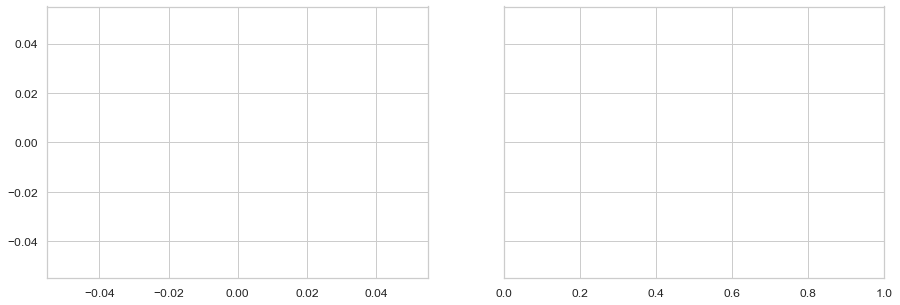

In [34]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

sns.lineplot(data=all_sims_generations_dfs, x='Generation', y='Group size', ci="sd", ax=ax1)
sns.lineplot(data=last_gen_df.loc[last_gen_df['Simulation'] == SIMULATION], x='Round', y='Group size', hue='Group label', ax=ax2)

# sns.lineplot(x='Generation', y='Probability', hue='Measures', data=phenotype_df, ci='sd', ax=ax1)
# sns.lineplot(x='Generation', y='Probability', hue='Measures', data=phenotype_df, estimator=None, ax=ax1)
# sns.scatterplot(data=all_sims_generations_dfs, x='Tolerance', y='Gossip probability', hue='Group size', size='Group size', marker='o')


ax1.set_title('Average group size at last round of a generation')
ax2.set_title('Group size for last generation')

handles, labels = ax2.get_legend_handles_labels()
legend = plt.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=2, title="Group label")
# plt.savefig(os.path.join(new_plot_path, "last_gen_avg_groupsize_and_per_group.png"),
            # dpi=300, 
            # format='png', 
            # bbox_inches='tight')

#### Average Gossip and Tolerance probabilities over multiple Simulations

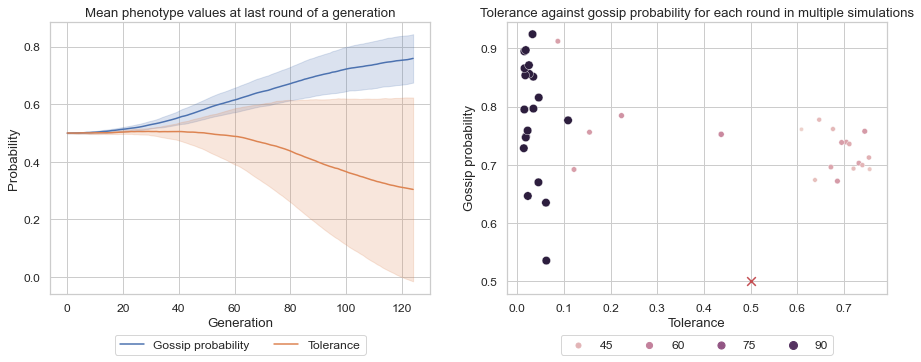

In [35]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(x='Generation', y='Probability', hue='Measures', data=phenotype_df, ci='sd', ax=ax1)
# sns.lineplot(x='Generation', y='Probability', hue='Measures', data=phenotype_df, estimator=None, ax=ax1)
sns.scatterplot(data=all_sims_generations_dfs.loc[all_sims_generations_dfs['Generation'] ==124], x='Tolerance', y='Gossip probability', hue='Group size', size='Group size', marker='o')
# sns.scatterplot(data=all_sims_groups_dfs.loc[(all_sims_groups_dfs['Generation'] == 124) & (all_sims_groups_dfs['Simulation'] == SIMULATION)], x='Tolerance', y='Gossip probability', hue="Group label", marker=',')

ax1.set_title('Mean phenotype values at last round of a generation')
ax2.set_title('Tolerance against gossip probability for each round in multiple simulations')

ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.225), ncol=2, borderaxespad=0.)
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -0.225), ncol=5, borderaxespad=0.)
plt.scatter(0.5, 0.5, marker='x', c='r', s=75) #-- starting point
plt.savefig(os.path.join(new_plot_path, "last_gen_avg_phenotypes_and_per_sim.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')

In [36]:
print(scipy.stats.pearsonr(all_sims_generations_dfs['Group size'], all_sims_generations_dfs['Tolerance']))
print(scipy.stats.pearsonr(all_sims_generations_dfs['Group size'], all_sims_generations_dfs['Gossip probability']))

(-0.7235678582323215, 0.0)
(0.7401921364898634, 0.0)


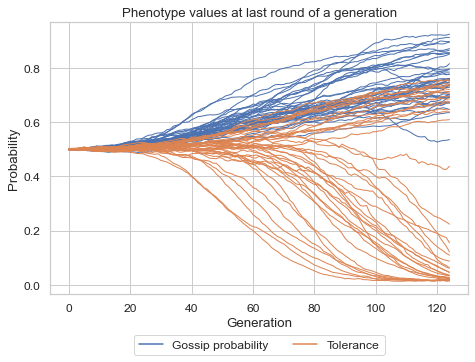

In [37]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.lineplot(data=phenotype_df, x='Generation', y='Probability', hue='Measures', estimator=None, units='Simulation', linewidth=1)
plt.title('Phenotype values at last round of a generation')
legend = plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.225), ncol=2, borderaxespad=0.)
plt.savefig(os.path.join(new_plot_path, "phenotypes_per_sim.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')

#### Insight into the plots of a single simulation (multiple groups survive)

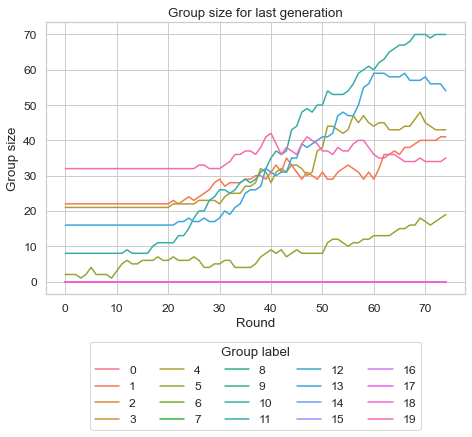

In [38]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.lineplot(data=last_gen_df.loc[last_gen_df['Simulation'] == SIMULATION], x='Round', y='Group size', hue='Group label')
plt.title('Group size for last generation')

handles, labels = ax.get_legend_handles_labels()
# legend = plt.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=2, title="Group label")
legend = plt.legend(handles=handles, labels=labels, loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=5, borderaxespad=0., title="Group label")
plt.savefig(os.path.join(new_plot_path, "last_gen_groupsize_multiple.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')

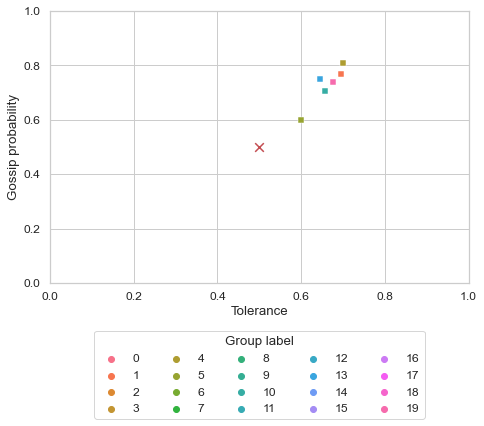

In [39]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.scatterplot(data=all_sims_groups_dfs.loc[(all_sims_groups_dfs['Generation'] == 124) & (all_sims_groups_dfs['Simulation'] == SIMULATION)], x='Tolerance', y='Gossip probability', hue="Group label", marker=',')

handles, labels = ax.get_legend_handles_labels()
legend = plt.legend(handles=handles, labels=labels, loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=5, borderaxespad=0., title="Group label")
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(0.5, 0.5, marker='x', c='r', s=75) #-- starting point
plt.savefig(os.path.join(new_plot_path, "last_gen_tolvsgos_multiple.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')

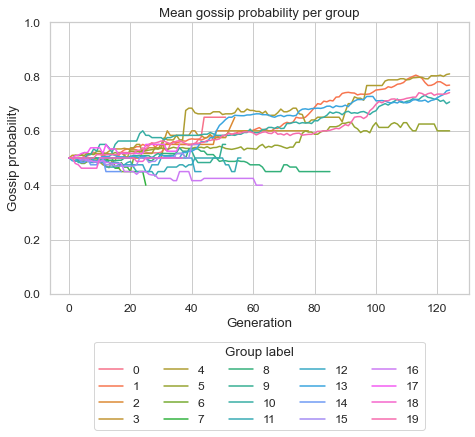

In [40]:
fig, ax = plt.subplots(figsize=(7.5, 5))
temp_sim_df = all_sims_groups_dfs.loc[all_sims_groups_dfs['Simulation'] == SIMULATION]
sns.lineplot(data=temp_sim_df, x='Generation', y='Gossip probability', hue='Group label')
plt.ylim(0,1)
plt.title('Mean gossip probability per group')

handles, labels = ax.get_legend_handles_labels()
legend = plt.legend(handles=handles, labels=labels, loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=5, borderaxespad=0., title="Group label")

plt.savefig(os.path.join(new_plot_path, "last_gen_gossip_probability_multiple.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')

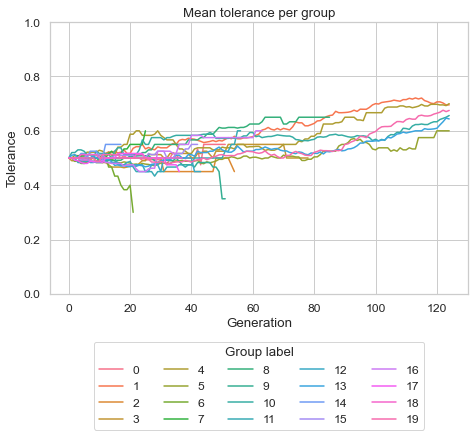

In [41]:
fig, ax = plt.subplots(figsize=(7.5, 5))
temp_sim_df = all_sims_groups_dfs.loc[all_sims_groups_dfs['Simulation'] == SIMULATION]
sns.lineplot(data=temp_sim_df, x='Generation', y='Tolerance', hue='Group label')
plt.ylim(0,1)
plt.title('Mean tolerance per group')

handles, labels = ax.get_legend_handles_labels()
legend = plt.legend(handles=handles, labels=labels, loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=5, borderaxespad=0., title="Group label")

plt.savefig(os.path.join(new_plot_path, "last_gen_tolerance_multiple.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')

### Few groups survive

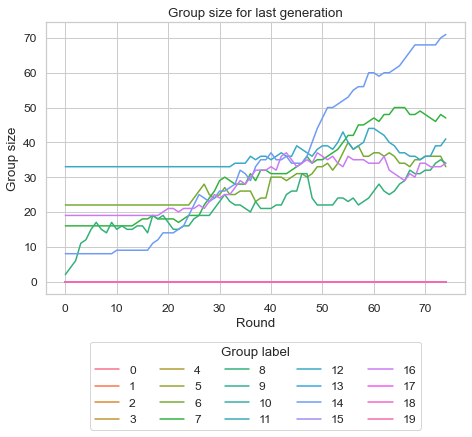

In [42]:
fig, ax = plt.subplots(figsize=(7.5, 5))
sns.lineplot(data=last_gen_df.loc[last_gen_df['Simulation'] == FEW_GROUPS_SIMULATION], x='Round', y='Group size', hue='Group label')
plt.title('Group size for last generation')

handles, labels = ax.get_legend_handles_labels()
# legend = plt.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=2, title="Group label")
legend = plt.legend(handles=handles, labels=labels, loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=5, borderaxespad=0., title="Group label")
plt.savefig(os.path.join(new_plot_path, "last_gen_groupsize_few.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')

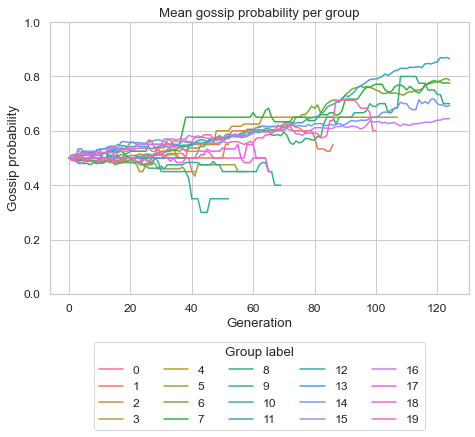

In [43]:
fig, ax = plt.subplots(figsize=(7.5, 5))
temp_sim_df = all_sims_groups_dfs.loc[all_sims_groups_dfs['Simulation'] == FEW_GROUPS_SIMULATION]
sns.lineplot(data=temp_sim_df, x='Generation', y='Gossip probability', hue='Group label')
plt.ylim(0,1)
plt.title('Mean gossip probability per group')

handles, labels = ax.get_legend_handles_labels()
legend = plt.legend(handles=handles, labels=labels, loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=5, borderaxespad=0., title="Group label")

plt.savefig(os.path.join(new_plot_path, "last_gen_gossip_probability_few.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')

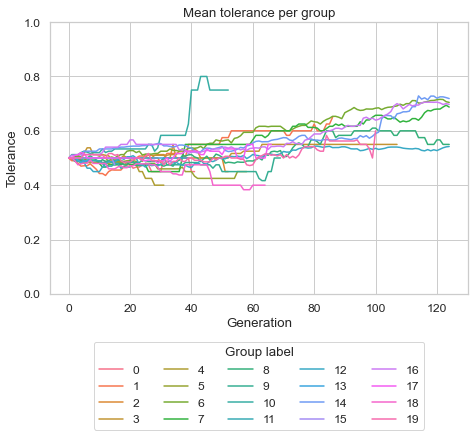

In [44]:
fig, ax = plt.subplots(figsize=(7.5, 5))
temp_sim_df = all_sims_groups_dfs.loc[all_sims_groups_dfs['Simulation'] == FEW_GROUPS_SIMULATION]
sns.lineplot(data=temp_sim_df, x='Generation', y='Tolerance', hue='Group label')
plt.ylim(0,1)
plt.title('Mean tolerance per group')

handles, labels = ax.get_legend_handles_labels()
legend = plt.legend(handles=handles, labels=labels, loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=5, borderaxespad=0., title="Group label")

plt.savefig(os.path.join(new_plot_path, "last_gen_tolerance_few.png"),
            dpi=300, 
            format='png', 
            bbox_inches='tight')